<a href="https://colab.research.google.com/github/navneetkrc/Colab_fastai/blob/master/plant_disease_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import gdown

Get the dataset from here [PlantVillage Dataset](https://drive.google.com/file/d/0B_voCy5O5sXMTFByemhpZllYREU/view)

In [1]:
#dataset downloaded and kept in gdrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!tar -xvzf /content/drive/My\ Drive/MLAI_Datasets/PlantVillage.tar.gz

In [0]:
PATH_IMG = Path('/content/PlantVillage/')

In [0]:
bs = 64 # batch_size

In [0]:
img_data = ImageDataBunch.from_folder(path=PATH_IMG, train='train', valid='val', ds_tfms=get_transforms(), size=224, bs=bs)

In [10]:
img_data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (44016 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato___healthy,Tomato___healthy,Tomato___healthy,Tomato___healthy,Tomato___healthy
Path: /content/PlantVillage;

Valid: LabelList (11004 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato___healthy,Tomato___healthy,Tomato___healthy,Tomato___healthy,Tomato___healthy
Path: /content/PlantVillage;

Test: None

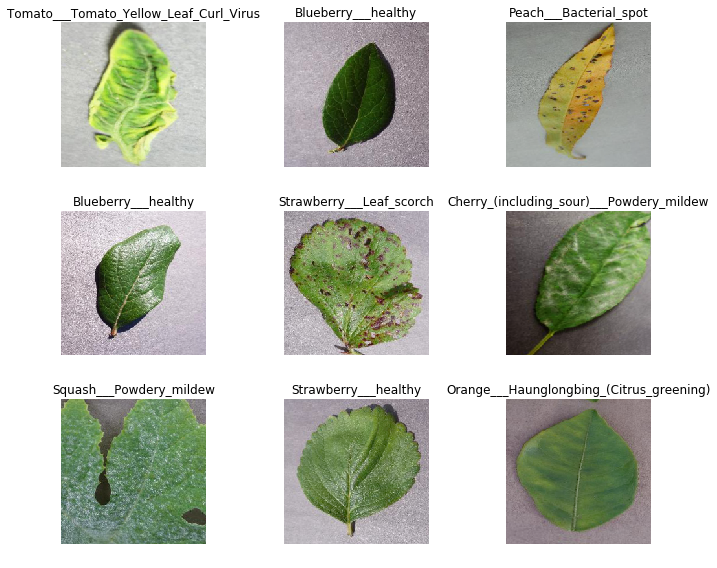

In [11]:
img_data.show_batch(rows=3, figsize=(10,8))

In [12]:
img_data.c

39

In [13]:
img_data.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [14]:
model = cnn_learner(img_data, models.resnet34, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 98969788.88it/s] 


In [15]:
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.276740,0.136054,0.956652,0.043348,07:08
1,0.151674,0.066353,0.978099,0.021901,07:15
2,0.105436,0.040274,0.987368,0.012632,07:16
3,0.069680,0.028095,0.989913,0.010087,07:08
4,0.048907,0.026642,0.990458,0.009542,07:07


In [16]:
model.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.091657,0.035241,0.988913,0.011087,07:11
1,0.049447,0.024022,0.991458,0.008542,07:11


In [0]:
model.save('train_7_cycles')

In [0]:
interpret = ClassificationInterpretation.from_learner(model)

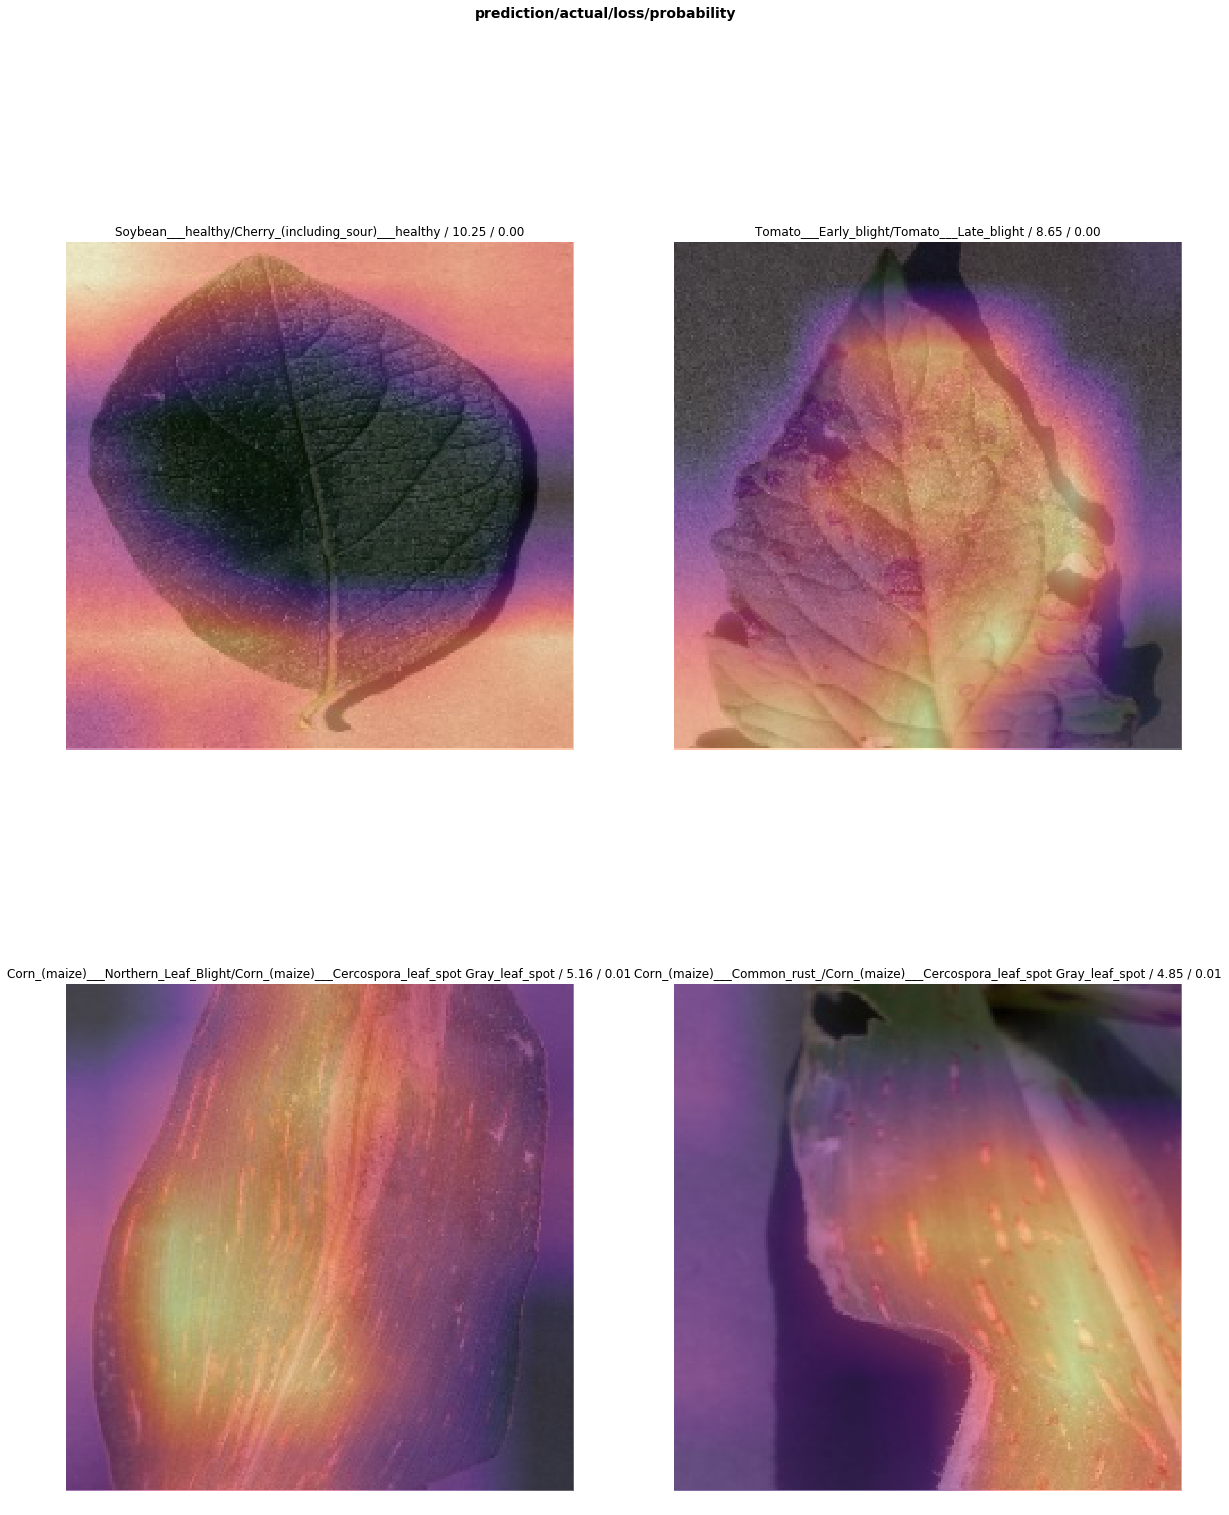

In [19]:
interpret.plot_top_losses(4, figsize=(20, 25))

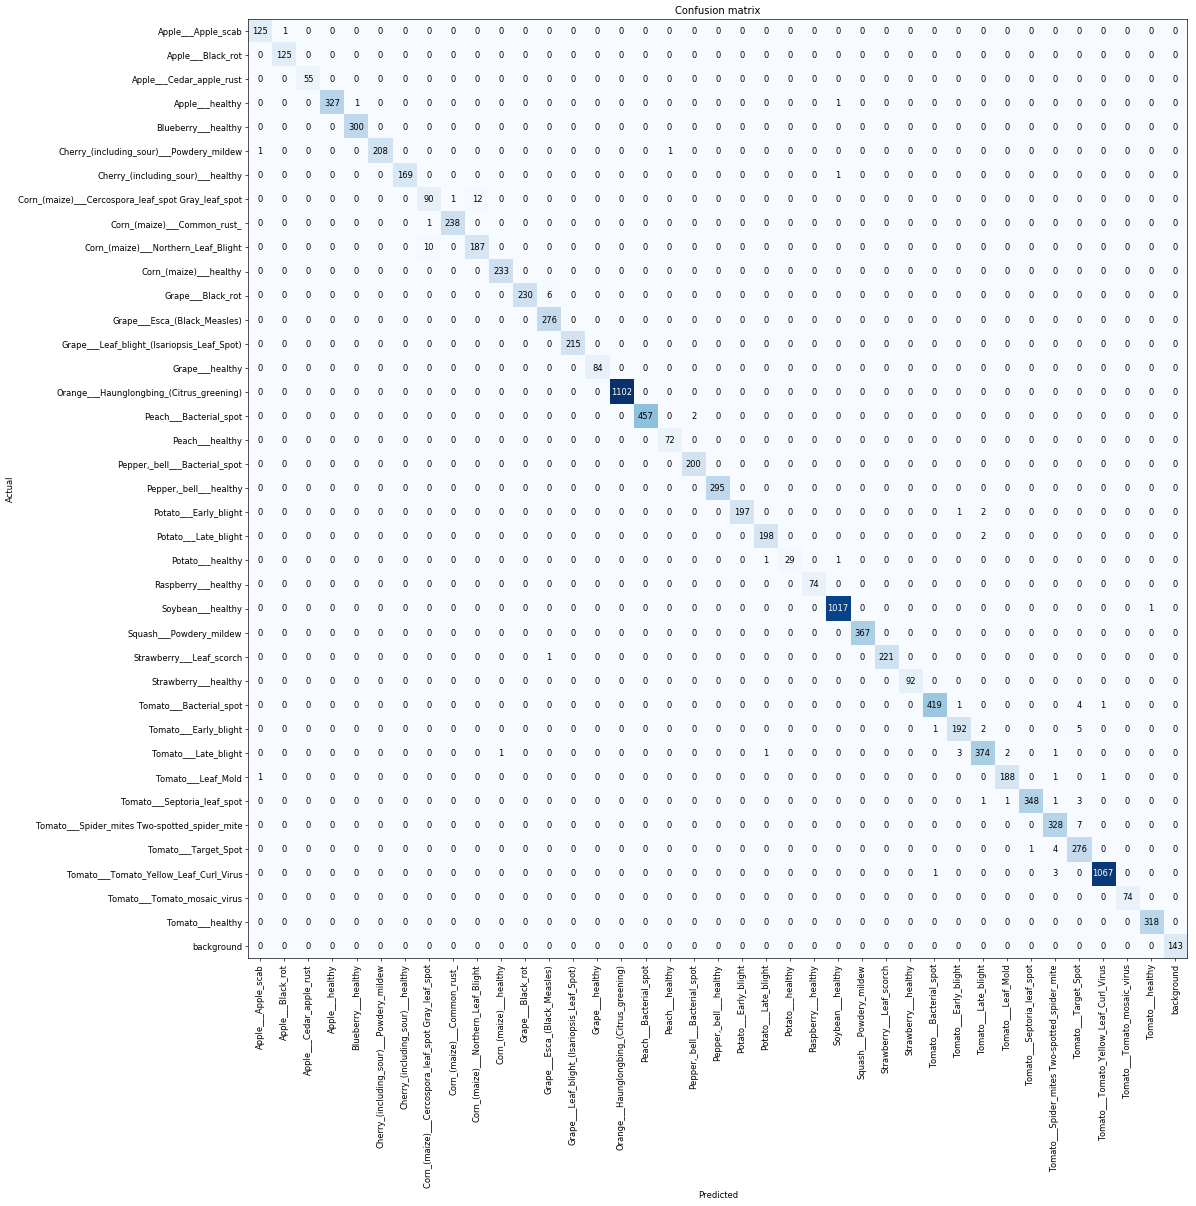

In [20]:
interpret.plot_confusion_matrix(figsize=(20,20), dpi=60)

In [21]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


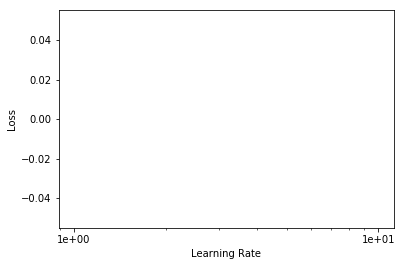

In [22]:
model.recorder.plot()

In [23]:
model.unfreeze()
model.fit_one_cycle(3, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.391835,0.371286,0.883951,0.116049,07:36
1,0.136249,0.065394,0.979098,0.020901,07:33
2,0.043800,0.020407,0.994547,0.005453,07:34


In [24]:
model.fit_one_cycle(5, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.156663,0.097456,0.970284,0.029716,07:31
1,0.188975,0.171599,0.946747,0.053253,07:37
2,0.092596,0.073852,0.977735,0.022265,07:37
3,0.033723,0.017851,0.994729,0.005271,07:35
4,0.024131,0.012114,0.996728,0.003272,07:36


In [0]:
model.save('train_lr_8_cycles')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


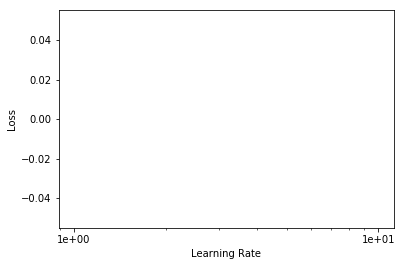

In [26]:
model.freeze()
model.lr_find()
model.recorder.plot()

In [27]:
lr = 1e-3/2
model.fit_one_cycle(2, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.016173,0.012522,0.996092,0.003908,07:20
1,0.018647,0.012033,0.996274,0.003726,07:21


In [28]:
model.fit_one_cycle(3, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.016538,0.011766,0.996456,0.003544,07:25
1,0.015084,0.011611,0.996819,0.003181,07:19
2,0.015720,0.012279,0.996547,0.003453,07:20


In [0]:
model.save('train_final5_cycles')

In [30]:
model.load('train_final5_cycles')

Learner(data=ImageDataBunch;

Train: LabelList (44016 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato___healthy,Tomato___healthy,Tomato___healthy,Tomato___healthy,Tomato___healthy
Path: /content/PlantVillage;

Valid: LabelList (11004 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tomato___healthy,Tomato___healthy,Tomato___healthy,Tomato___healthy,Tomato___healthy
Path: /content/PlantVillage;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(

In [0]:
model.export('export_resnet34_model.pkl')